# Assignment 2 - Data Visualization Complementary Views 

## Author - Natalie Moore



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

In [1]:
import pandas as pd #importing necessary packages
import numpy as np
from numpy import matlib
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
    
%matplotlib inline

from IPython.display import set_matplotlib_formats #matplotlib formatting that I like
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 11
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [2]:
#reading in the data and creating the headcount_df dataframe
def read_headcount_df(fileName = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'):
    'Function to load the auto price data set from a .csv file' 

    #read the .csv file with the pandas read_csv method
    headcount_df = pd.read_csv(fileName)
    
    #naming columns
 
        
    return headcount_df

headcount_df = read_headcount_df()

headcount_df.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [3]:
print (headcount_df.dtypes, headcount_df.shape)

GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object (175677, 9)


Text(0.5,0.98,'Figure 1')

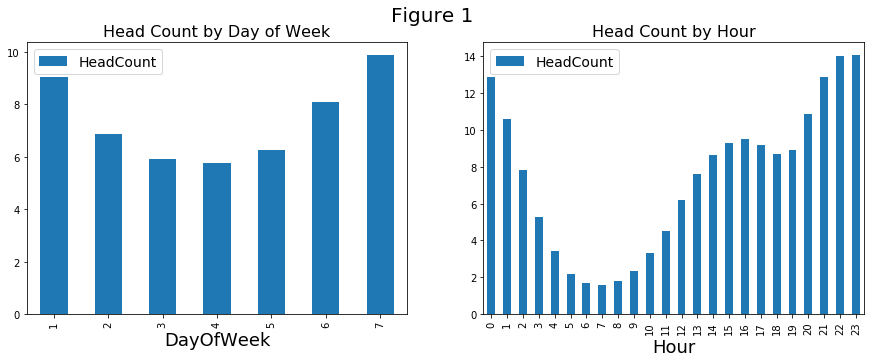

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1 = headcount_df.loc[:,['DayOfWeek','HeadCount']].groupby(['DayOfWeek']).agg('mean').plot.bar(ax=ax[0])
ax2 = headcount_df.loc[:,['Hour','HeadCount']].groupby(['Hour']).agg('mean').plot.bar(ax=ax[1])
ax1.set_title('Head Count by Day of Week', fontsize=16)
ax2.set_title('Head Count by Hour', fontsize=16)
fig.suptitle('Figure 1', fontsize=20)

Figure 1 [above] shows the mean number of patrons at the casino per weekday and hour. The left plot is grouped by weekday (1 being Sunday and 7 being Saturday) and the right plot is grouped by hour (in military time).

From these plots it's clear that Friday - Sunday are when the most people are in the casino, and Wednesday the least. You can also see that from 20:00 to midnight is the busiest time, while 7:00 is the slowest time. There is also a plateau in the mean number of patrons during about 18:00 - 19:00. It's important to note that these times do not specify which tables are the busiest during the high times.

C:\Users\natal\AnacondaNEW\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Figure 2')

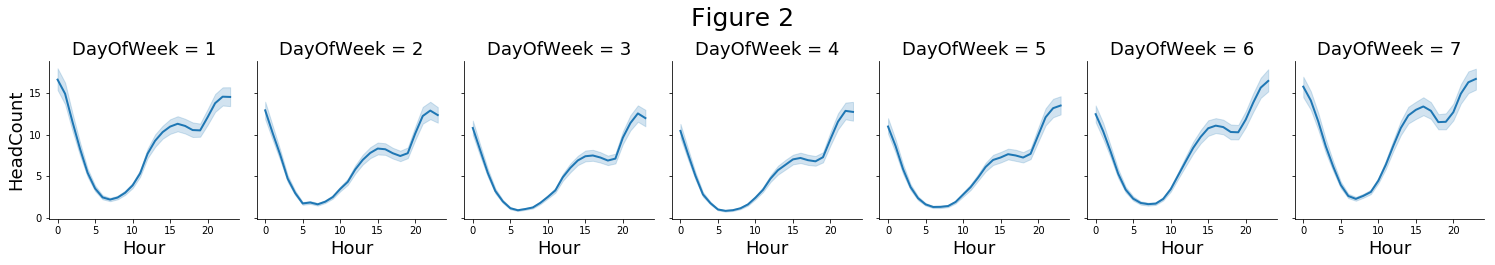

In [5]:
g = sns.FacetGrid(headcount_df, col="DayOfWeek")
g = g.map(sns.lineplot, "Hour","HeadCount")
g.fig.subplots_adjust(top = .73, bottom=0)
g.fig.suptitle('Figure 2', fontsize=25)

Figure 2 [above] is a more detailed display of what is shown in Figure 2. Each subplot shows the mean number of patrons per hour, grouped by day of the week if reading from left to right (1 being Sunday and 7 being Saturday). 

It is now even more clear that around 7:00 (miliary time) there is a daily low with respect to number of patrons, and each night exists a daily high around midnight. On Mondays - Thursdays during the approximate hours between 15:00 and 20:00, there is a much lower mean than on the weekends (Friday - Sunday). 

Text(0.5,0,'Game Code')

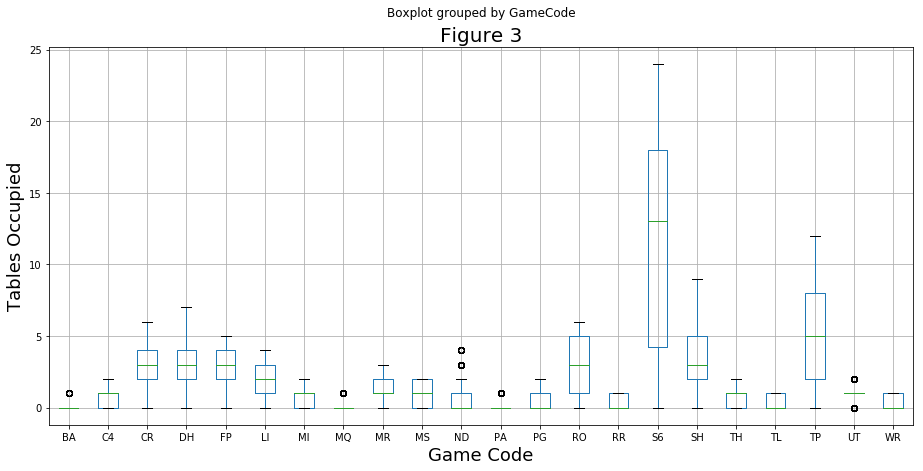

In [6]:
ax = plt.figure(figsize=(15,7)).gca()
headcount_df.loc[:,['GameCode', 'TablesOcc']].boxplot(by = ['GameCode'], ax = ax)
ax.set_title('Figure 3') # Give the plot a main title
ax.set_ylabel('Tables Occupied')# Set text for y axis
ax.set_xlabel('Game Code')# Set text for y axis

Figure 3 [above] shows the median number of occupied tables per game in this casino. 

From this view, without specifying time of day or day of the week, it appears that Big Six (Game Code 'S6') has by far the most occupied tables with Texas Hold'em Poker (Game Code 'TP') following behind. It is worth noting that this plot does not show how many total tables each game has.